In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data import stock_data
from wfwGARCH import clusteringTest, GARCHWalkForward
from statsmodels.graphics.tsaplots import plot_acf
from hvPred import HVmodel

In [4]:
con = sqlite3.connect('stock_data.db', check_same_thread=False)

In [7]:
health_tech=['CLSD','MRKR','XXII','WINT','CDNA','IMNN','OVID','JUNS','ATNF','ELUT']
len(health_tech)

10

In [11]:
health_tech_stocks = [
    "MRNA",  # Moderna Inc.
    "BIIB",  # Biogen Inc.
    "VRTX",  # Vertex Pharmaceuticals
    "REGN",  # Regeneron Pharmaceuticals
    "ILMN",  # Illumina Inc.
    "DXCM",  # Dexcom Inc.
    "CRSP",  # CRISPR Therapeutics (mid-cap but very volatile)
    "NVCR"   # NovoCure Ltd. (mid-cap, high volatility)
]
len(health_tech_stocks)

8

In [12]:
[st in health_tech for st in health_tech_stocks]

[False, False, False, False, False, False, False, False]

In [ ]:
for st in health_tech:
    dt = stock_data(st)
    dt.get_daily('full')
    dt.insert_table(con, if_exists='replace')

Data for CLSD inserted into database
Data for MRKR inserted into database
Data for XXII inserted into database
Data for WINT inserted into database
Data for CDNA inserted into database
Data for IMNN inserted into database
Data for OVID inserted into database
Data for JUNS inserted into database
Data for ATNF inserted into database
Data for ELUT inserted into database


In [15]:
for st in health_tech_stocks:
    dt = stock_data(st)
    dt.get_daily('full')
    dt.insert_table(con, if_exists='replace')

Data for MRNA inserted into database
Data for BIIB inserted into database
Data for VRTX inserted into database
Data for REGN inserted into database
Data for ILMN inserted into database
Data for DXCM inserted into database
{'Information': 'We have detected your API key as YV04LNOO150FFVJZ and our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}
'stock_data' object has no attribute 'records'
{'Information': 'We have detected your API key as YV04LNOO150FFVJZ and our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}
'stock_data' object has no attribute 'records'


In [16]:
health_tech_stocks[:-2]

['MRNA', 'BIIB', 'VRTX', 'REGN', 'ILMN', 'DXCM']

In [ ]:
res = {}
for st in health_tech:
    dt = stock_data(st)
    df = dt.load_data(con)
    df.index = pd.to_datetime(df.index, format='ISO8601')
    df.sort_index(inplace=True)
    df['returns'] = np.log(df['close'] / df['close'].shift(1))*100
    df.dropna(inplace=True)

    ct = clusteringTest(df['returns'])
    score = ct.clusteringScore()

    res[st]=[len(df),score]
    

In [17]:
res = {}
for st in health_tech_stocks[:-2]:
    dt = stock_data(st)
    df = dt.load_data(con)
    df.index = pd.to_datetime(df.index, format='ISO8601')
    df.sort_index(inplace=True)
    df['returns'] = np.log(df['close'] / df['close'].shift(1))*100
    df.dropna(inplace=True)

    ct = clusteringTest(df['returns'])
    score = ct.clusteringScore()

    res[st]=[len(df),score]
    

In [10]:
df_clustering = pd.DataFrame.from_dict(res, orient='index', columns=["Observations", "Clustering Score"])
df_clustering.sort_values(by='Clustering Score',ascending=False, inplace=True)
df_clustering

,Observations,Clustering Score
JUNS,152,0.321
CDNA,2765,0.153
CLSD,2292,0.093
ELUT,1196,0.077
ATNF,2016,0.026
XXII,3638,0.019
IMNN,6464,0.016
OVID,2059,0.010
WINT,2388,0.001
MRKR,2844,0.000


In [18]:
df_clustering = pd.DataFrame.from_dict(res, orient='index', columns=["Observations", "Clustering Score"])
df_clustering.sort_values(by='Clustering Score',ascending=False, inplace=True)
df_clustering

,Observations,Clustering Score
MRNA,1658,0.558
REGN,6464,0.183
ILMN,6277,0.166
VRTX,6464,0.119
BIIB,6464,0.043
DXCM,5095,0.004


In [21]:
def get_stock_data(stock_list):
    df_dict = {}
    for stock in stock_list:
        st = stock_data(stock)
        df = st.load_data(con)
        df.index = pd.to_datetime(df.index, format='ISO8601')
        df.sort_index(inplace=True)
        df_dict[stock] = df
        df_dict[stock]['returns'] = np.log(df['close'] / df['close'].shift(1))*100 
        df_dict[stock].dropna(inplace=True)
    return df_dict

In [22]:
df_health_tech = get_stock_data(health_tech)

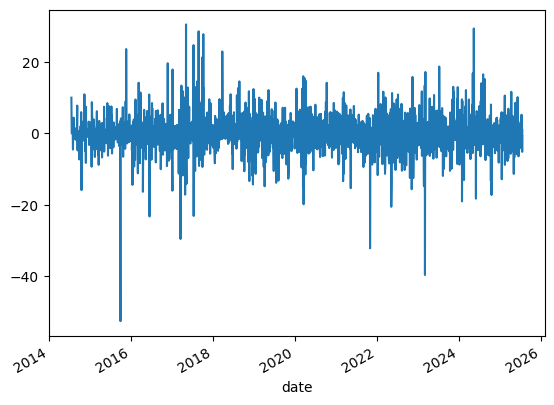

In [30]:
df_health_tech['CDNA']['returns'].plot()
plt.show()

In [ ]:
ct = clusteringTest(df_health_tech['']['returns'])

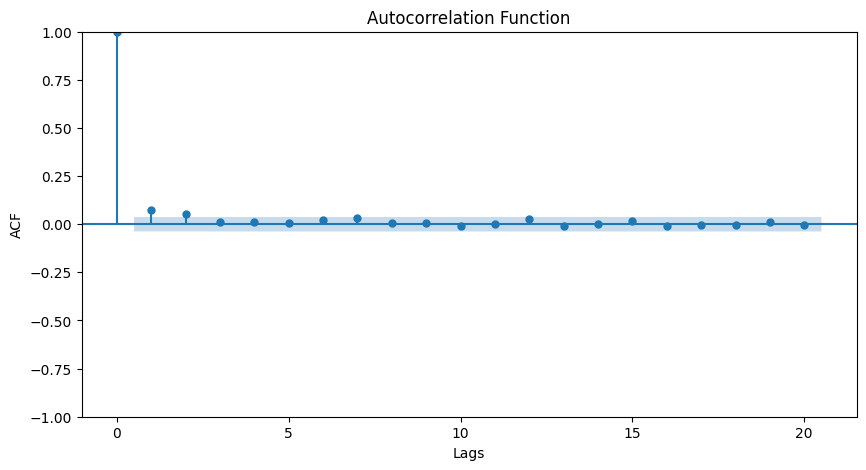

In [32]:
ct.plotACF()